In [1]:
#Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd


In [4]:
# Load the Iris dataset
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# Add species (target) to the DataFrame for reference 
df['species'] = iris.target



In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
# Drop the species column for clustering 
df_clustering = df.drop(columns=['species'])

In [21]:
df_clustering.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#qn 2

In [23]:
#KMeans
# KMeans is a centroid-based clustering algorithm. It works by:

# 1.Choosing k initial centroids.

# 2.Assigning each point to the nearest centroid.

# 3.Recomputing the centroids as the mean of the assigned points.

# 4.Repeating steps 2–3 until convergence (no change in assignments or centroids).



# Why KMeans is Suitable for Iris:

# The Iris dataset is small, numeric, and fairly well-structured.

# It has 3 natural species (setosa, versicolor, virginica), making it well-suited to clustering into 3 groups.

# KMeans performs well on convex, spherical clusters, which is a reasonable assumption for Iris.

In [27]:
#KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['kmeans_cluster'] = kmeans.fit_predict(df_clustering)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


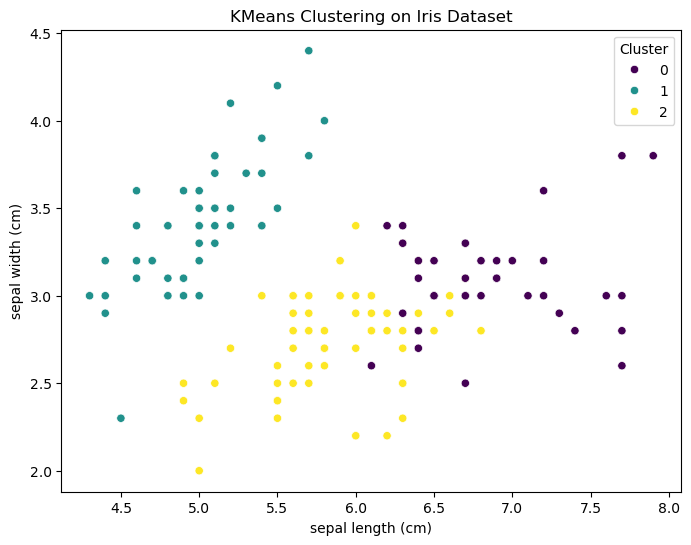

In [31]:
# Visualize clusters using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_clustering.iloc[:, 0],
    y=df_clustering.iloc[:, 1],
    hue=df_clustering['kmeans_cluster'],
    palette='viridis'
)
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

In [35]:
#  Hierarchical Clustering
# Hierarchical clustering builds a hierarchy of clusters either by:

#Agglomerative (bottom-up): Start with individual points and merge the closest pairs.

#Divisive (top-down): Start with all points and recursively split.

#It creates a dendrogram to visualize the merging/splitting process.




# Why Suitable for Iris:
# 1. Doesn’t require a pre-defined number of clusters.

#2. Reveals hierarchy and structure in data, good for small datasets like Iris.

#3. Can visually inspect clusters using dendrogram.

In [37]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

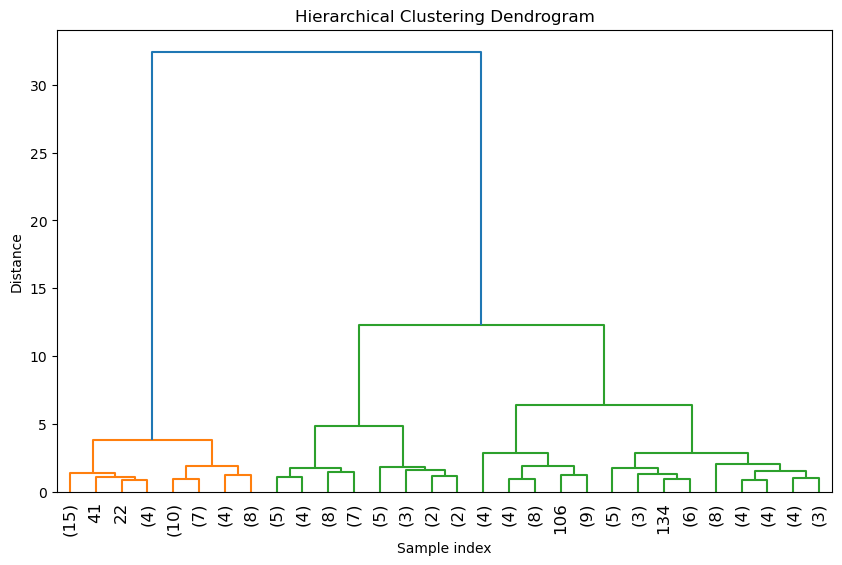

In [39]:
# Create linkage matrix
linkage_matrix = linkage(df_clustering.iloc[:, :-1], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

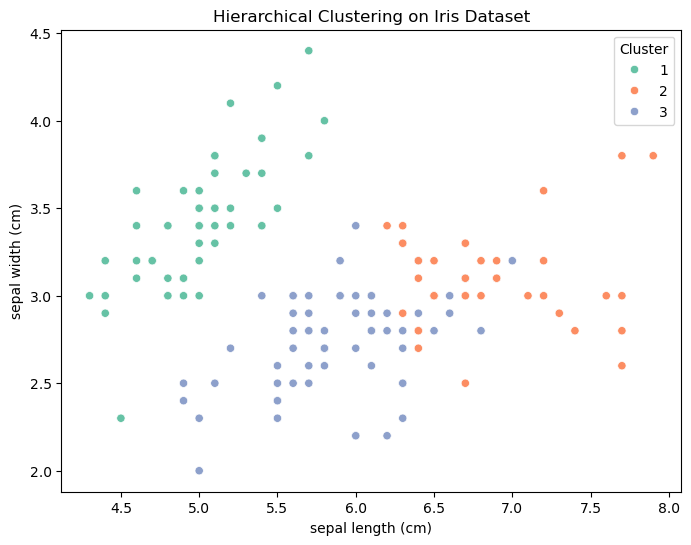

In [41]:
# Assign clusters (cut dendrogram at 3 clusters)
df_clustering['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_clustering.iloc[:, 0],
    y=df_clustering.iloc[:, 1],
    hue=df_clustering['hierarchical_cluster'],
    palette='Set2'
)
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()